In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [8]:
df=pd.read_csv(r"iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

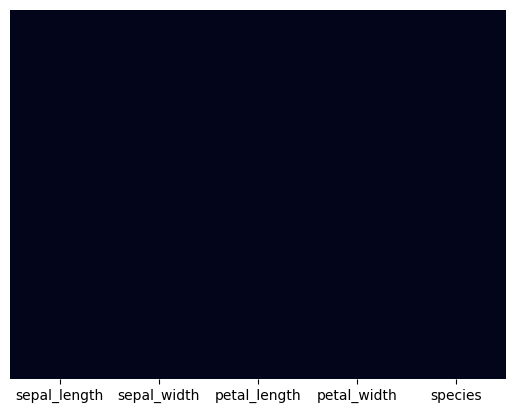

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
x=df.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y=df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean').fit(x_train_scale,y_train)
knn.predict(x_train_scale)
knn.score(x_train_scale,y_train)

0.975

In [17]:
knn.predict(x_test_scale)
knn.score(x_test_scale,y_test)

0.9

In [18]:
pred=knn.predict(x_test_scale)
matrix=classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      0.83      0.87        12
   virginica       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[11,  0,  0],
       [ 0, 10,  2],
       [ 0,  1,  6]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual value')

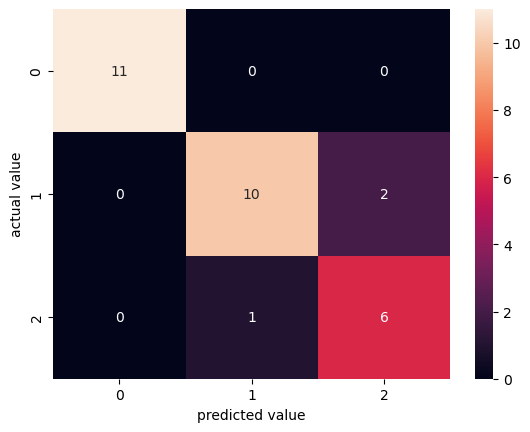

In [20]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True,fmt="")
plt.xlabel('predicted value')
plt.ylabel('actual value')

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=3,p=3,metric='euclidean').fit(x_train_scale,y_train)
knn1.predict(x_train_scale)
knn1.score(x_train_scale,y_train)

0.9583333333333334

In [22]:
knn1.predict(x_test_scale)
knn1.score(x_test_scale,y_test)

0.9666666666666667

In [23]:
pred=knn1.predict(x_test_scale)
matrix=classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        12
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [24]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,pred)
cm1

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  7]], dtype=int64)

Text(33.22222222222222, 0.5, 'actual value')

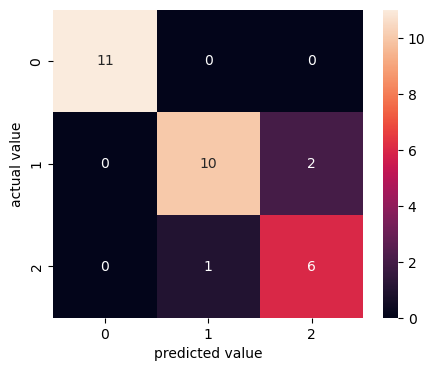

In [32]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted value')
plt.ylabel('actual value')